# Level spacing distribution for desymmetrized Robnik Billiard

In [1]:
eigs = Flatten[Import["./data/eigenvals.dat"]];
levnum = Length[eigs]

3000

In [3]:
(* dist funcs *)
Poisson[s_] := Exp[-s];
Wigner[s_] := (\[Pi]*s)/2*Exp[-(\[Pi]/4)*s^2];

## Naive method

In [15]:
(* Parameter
----------
discardlevel : a number of discard eigenvalues from the ground state
*)

PlotNaivePDF[eigs_, discardlevel_]:=
    Module[
        {eigvals, \[CapitalDelta]E, mean\[CapitalDelta]E},
        eigvals = eigs[[discardlevel;;-1]];
        \[CapitalDelta]E = Table[0, {i, 1, levnum-discardlevel}];
        For[i = 1, i < levnum - discardlevel,  i++, \[CapitalDelta]E[[i]] = eigvals[[i + 1]] - eigvals[[i]]];
        mean\[CapitalDelta]E = Mean[\[CapitalDelta]E];
        dEbar = \[CapitalDelta]E/mean\[CapitalDelta]E;
        Show[
            Histogram[dEbar, Automatic, "PDF", PlotRange -> All, AxesLabel -> {"s", "P(s)"}],
            Plot[
                {Poisson[s], Wigner[s]},
                {s, 0, 3.}, 
                AxesLabel -> {"s", "P(s)"},
                PlotLegends -> {"Poisson", "Wigner"}, 
                PlotStyle -> {{Blue, Dashing[Medium]}, {Red,Dashing[Medium]}}
            ]
        ]
    ]

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>       RGBColor[0, 0, 1], Dashing[Medium]], 
 
>      Directive[Opacity[1.], AbsoluteThickness[1.6], RGBColor[1, 0, 0], 
 
>       Dashing[Medium]]}, {Poisson, Wigner}, LegendMarkers -> None, LabelStyle -> {}, 
 
>     LegendLayout -> Column], After, Identity]]
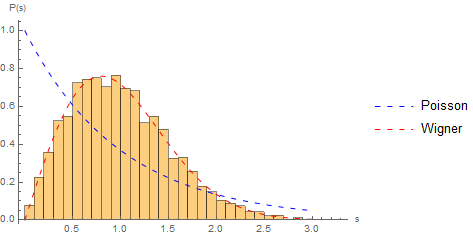

In [17]:
PlotNaivePDF[eigs, 200]

## Unfolding Procedure

* Ref : 4.2.3 in http://www.is.ocha.ac.jp/~kudo/dron.pdf

In [20]:
(* Parameter
----------
discardlevel : a number of discard eigenvalues from the ground state.
interval : interval between data points for interpolation.
*)

PlotLevelSP[eigs_, discardlevel_, interval_]:=
    Module[
        {eigvals},
        eigvals = eigs[[discardlevel;;-1]];
        set = {#[[1]], #[[2]]}& /@ Transpose[{eigvals, Range[discardlevel,levnum]}];
        spfun = Interpolation[set[[;; ;;interval]], Method -> {"Spline"}];
        Nbar = spfun[eigvals];
        s = Nbar[[2;;]]-Nbar[[;;-2]];
        Show[
            Histogram[s, {0.1}, "PDF", PlotRange -> All, AxesLabel -> {"s", "P(s)"}, PlotLabel -> "Level-spacing distribution"],
            Plot[
                {Poisson[s], Wigner[s]},
                {s, 0, 3.},
                PlotLegends -> {"Poisson", "Wigner"},
                PlotStyle -> {{Blue, Dashing[Medium]}, {Red,Dashing[Medium]}}
            ]
        ]        
    ]

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>       RGBColor[0, 0, 1], Dashing[Medium]], 
 
>      Directive[Opacity[1.], AbsoluteThickness[1.6], RGBColor[1, 0, 0], 
 
>       Dashing[Medium]]}, {Poisson, Wigner}, LegendMarkers -> None, LabelStyle -> {}, 
 
>     LegendLayout -> Column], After, Identity]]
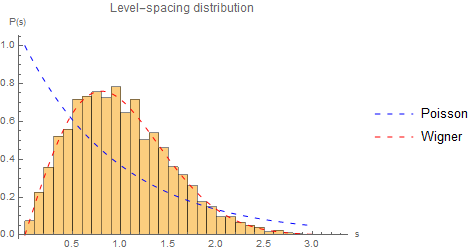

In [22]:
PlotLevelSP[eigs, 200, 100]

---
## cf. Weyl Law

* Ref. [spectra finite systems](http://smallsystems.isn-oldenburg.de/Docs/THEO3/publications/spectra.finite.systems.pdf) (p.59~)

\begin{eqnarray}
-\Delta \psi_n(\mathbf{x}) = E_n \psi_n(\mathbf{x}) \quad \mathbf{x} \in\Omega \qquad \psi_n(\mathbf{x})=0 \ \ \text{for} \ \mathbf{x} \in \partial\Omega
\end{eqnarray}
### Generalized Weyl formula (for the Laplace–Beltrami operator) :

The average integrated level density $\langle N(E) \rangle$ is written by

\begin{eqnarray}
\langle N(E) \rangle = \frac{\mathcal{A}}{4\pi}E - \frac{\mathcal{L}}{4\pi}\sqrt{E} + \mathcal{C}, \qquad \mathcal{L} = \mathcal{L}^- -\mathcal{L}^+ 
\end{eqnarray}

where $\mathcal{L}^-$ and $\mathcal{L}^+$ are the lengths of the pieces of the boundary $\partial\Omega$ with Dirichlet and
Neumann boundary conditions, respectively.

$\mathcal{C}$ is constant and depends on curvature.

In [176]:
WaLL[{a_, \[Epsilon]_}, t_] := {a*(1 + \[Epsilon]*Cos[t])*Cos[t], a*(1 + \[Epsilon]*Cos[t])*Sin[t]};

2              -4 eps
ConditionalExpression[2 (Sqrt[(-1 + eps) ] EllipticE[-----------] + 
                                                               2
                                                     (-1 + eps)
 
                     2              4 eps
>      Sqrt[(1 + eps) ] EllipticE[----------]), 
                                           2
                                  (1 + eps)
 
         1                     1                   1
>   (Re[--- + eps] >= 2 || Re[--- + eps] <= -2 || --- + eps ∉ Reals) && 
        eps                   eps                 eps
 
>    Re[(-2 + eps) eps] > -1 && Re[eps (2 + eps)] > -1]
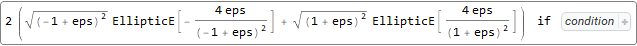

In [175]:
ArcLength[WaLL[{a, eps}, \[Theta]], {\[Theta], 0, 2 Pi}]

In [32]:
(* In the case of desymmetrized calculation (orange region) *)

Weyllaw[eps_,E_]:=(
        a = Sqrt[3/(2+eps^2)];
        area = Pi*(a^2)*(2+eps^2)/4;
        If[eps==1,
           perimeter = 6*a, (* 8*a/2 + 2a *)
           perimeter = a*((1+eps)*EllipticE[4*eps/((1+eps)^2)]-(eps-1)*EllipticE[-4*eps/((eps-1)^2)]) + 2*a*eps
        ];
        Navg = area*E/(4*Pi) - perimeter*Sqrt[E]/(4*Pi);
        Return[Navg]
    )

In [39]:
eigs = eigs[[200;;-1]];

In [42]:
Plotcheck[start_, end_]:=
    Show[{
        ListPlot[
            set[[start;;end]], 
            PlotStyle -> {Blue}, 
            PlotRange -> All,
            AxesLabel -> {"E", "Level"},
            PlotLegends -> {"eigenval"},
            GridLines -> Automatic,
            ImageSize -> Large
        ],
        Plot[
            {spfun[x], Weyllaw[1,x]}, 
            {x, eigs[[start]], eigs[[end]]}, 
            PlotStyle -> {Red, Green}, 
            AxesLabel -> {"E", "spfun"},
            PlotLegends -> {"<N(E)>:spline", "Weyl Law"},
            GridLines -> Automatic
        ]
    }]

{Legended[Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>         AbsoluteThickness[1.6], RGBColor[0, 0, 1]]}, {eigenval}, 
 
>       LegendMarkers -> {{False, Automatic}}, Joined -> {False}, LabelStyle -> {}, 
 
>       LegendLayout -> Column], After, Identity]], 
 
>    Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>        RGBColor[1, 0, 0]], Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>        RGBColor[0, 1, 0]]}, {<N(E)>:spline, Weyl Law}, LegendMarkers -> None, 
 
>      LabelStyle -> {}, LegendLayout -> Column], After, Identity]], 
 
>   Legended[Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.00916667], 
 
>         AbsoluteThickness[1.6], RGBColor[0, 0, 1]]}, {eigenval}, 
 
>       LegendMarkers -> {{False, Automatic}}, Joined -> {False}, LabelStyle -> {}, 
 
>       LegendLayout -> Column], After, Identity]], 
 
>    Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>        RGBColor[1, 0, 0]], Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>        RGBColor[0, 1, 0]]}, {<N(E)>:spline, Weyl Law}, LegendMarkers -> None, 
 
>      LabelStyle -> {}, LegendLayout -> Column], After, Identity]]}
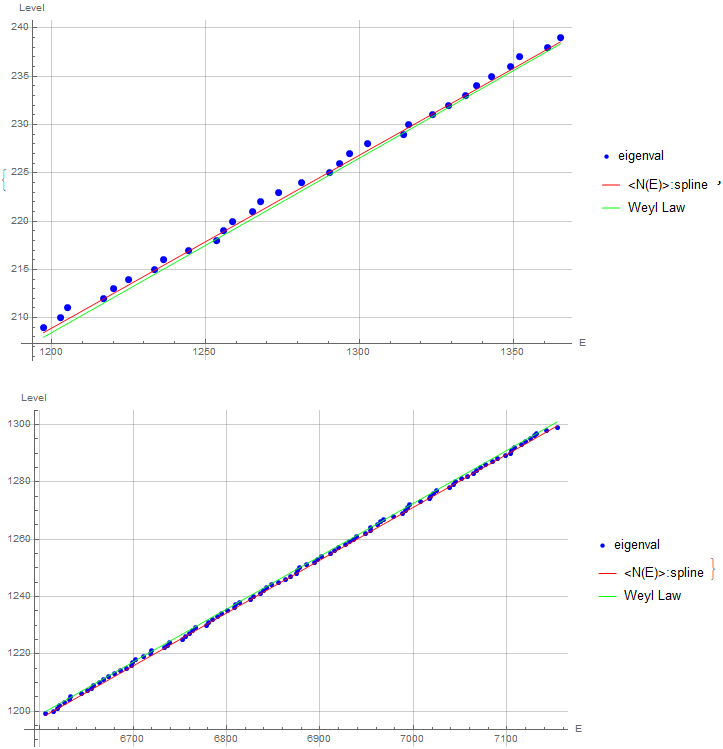

In [43]:
{Plotcheck[10, 40], Plotcheck[1000, 1100]}